In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
truth = pd.read_csv("Nimmitha.dat", names=['px', 'py', 'pz', 'E'], usecols=range(0,4))
measured = pd.read_csv("Nimmitha.dat", names=['px', 'py', 'pz', 'E'], usecols=range(4,8))

In [50]:
truth

,px,py,pz,E
0,0.077900,-0.996961,0.131612,1.008624
1,0.382206,0.924077,0.666408,1.201707
2,0.423579,0.905859,1.049659,1.449753
3,-0.390290,-0.920692,0.339327,1.056003
4,-0.620743,0.784014,0.171714,1.014636
...,...,...,...,...
117740,-0.975815,-0.218597,0.583946,1.158012
117741,0.567880,-0.823111,-0.534686,1.133971
117742,0.697512,-0.716573,0.217646,1.023411
117743,0.074979,-0.997185,1.005426,1.418055


In [51]:
measured

,px,py,pz,E
0,-0.994967,0.100202,2.286034,2.495186
1,0.093435,-0.995625,3.348509,3.494641
2,-0.953119,-0.302597,3.955863,4.080300
3,0.994698,-0.102838,1.740215,2.007074
4,-0.063860,0.997959,2.314426,2.521223
...,...,...,...,...
117740,0.971608,-0.236598,6.212292,6.292263
117741,-0.883418,-0.468586,0.381921,1.070450
117742,-0.936581,0.350451,4.251616,4.367635
117743,-0.579387,0.815053,3.057640,3.217012


In [52]:
def calcPhi(row):
    # returns phi using Py and Px

    if row["px"] < 0.0:
        return np.arctan( row["py"] / row["px"]) + np.pi
    if row["px"] > 0.0:
        return np.arctan( row["py"] / row["px"])
    if row["px"] == 0:
        return np.pi

In [53]:
truth['phi'] = truth.apply(lambda row: calcPhi(row), axis=1)
measured['phi'] = measured.apply(lambda row: calcPhi(row), axis=1)

In [54]:
truth

,px,py,pz,E,phi
0,0.077900,-0.996961,0.131612,1.008624,-1.492817
1,0.382206,0.924077,0.666408,1.201707,1.178613
2,0.423579,0.905859,1.049659,1.449753,1.133403
3,-0.390290,-0.920692,0.339327,1.056003,4.311442
4,-0.620743,0.784014,0.171714,1.014636,2.240486
...,...,...,...,...,...
117740,-0.975815,-0.218597,0.583946,1.158012,3.361969
117741,0.567880,-0.823111,-0.534686,1.133971,-0.966868
117742,0.697512,-0.716573,0.217646,1.023411,-0.798877
117743,0.074979,-0.997185,1.005426,1.418055,-1.495747


In [55]:
truth['P'] = np.sqrt(truth['px']**2 + truth['py']**2 + truth['pz']**2)
measured['P'] = np.sqrt(measured['px']**2 + measured['py']**2 + measured['pz']**2)

In [61]:
truth['theta'] = np.arccos(truth["pz"]/truth["P"])
measured['theta'] = np.arccos(measured["pz"]/measured["P"])

In [62]:
truth["psu"] = np.log10(np.tan(truth["theta"]/2))
measured["psu"] = np.log10(np.tan(measured["theta"]/2))

In [63]:
truth

,px,py,pz,E,phi,P,theta,psu
0,0.077900,-0.996961,0.131612,1.008624,-1.492817,1.008624,1.439937,-0.056994
1,0.382206,0.924077,0.666408,1.201707,1.178613,1.201707,0.982973,-0.271404
2,0.423579,0.905859,1.049659,1.449753,1.133403,1.449753,0.761175,-0.397838
3,-0.390290,-0.920692,0.339327,1.056003,4.311442,1.056003,1.243662,-0.144677
4,-0.620743,0.784014,0.171714,1.014636,2.240486,1.014636,1.400741,-0.074213
...,...,...,...,...,...,...,...,...
117740,-0.975815,-0.218597,0.583946,1.158012,3.361969,1.158012,1.042265,-0.241038
117741,0.567880,-0.823111,-0.534686,1.133971,-0.966868,1.133971,2.061806,0.222367
117742,0.697512,-0.716573,0.217646,1.023411,-0.798877,1.023411,1.356492,-0.093792
117743,0.074979,-0.997185,1.005426,1.418055,-1.495747,1.418055,0.782693,-0.384440


In [64]:
measured

,px,py,pz,E,phi,P,theta,psu
0,-0.994967,0.100202,2.286034,2.495186,3.041222,2.495186,0.412359,-0.679539
1,0.093435,-0.995625,3.348509,3.494641,-1.477224,3.494641,0.290209,-0.835256
2,-0.953119,-0.302597,3.955863,4.080300,3.449009,4.080300,0.247602,-0.905049
3,0.994698,-0.102838,1.740215,2.007074,-0.103020,2.007074,0.521565,-0.573717
4,-0.063860,0.997959,2.314426,2.521223,1.634700,2.521223,0.407846,-0.684455
...,...,...,...,...,...,...,...,...
117740,0.971608,-0.236598,6.212292,6.292263,-0.238863,6.292263,0.159602,-1.097068
117741,-0.883418,-0.468586,0.381921,1.070450,3.629282,1.070450,1.205971,-0.162078
117742,-0.936581,0.350451,4.251616,4.367635,2.783540,4.367635,0.231006,-0.935470
117743,-0.579387,0.815053,3.057640,3.217012,2.188773,3.217012,0.316085,-0.797590


In [65]:
res_psu = measured.psu - truth.psu

In [67]:
res_phi = measured.phi - truth.phi

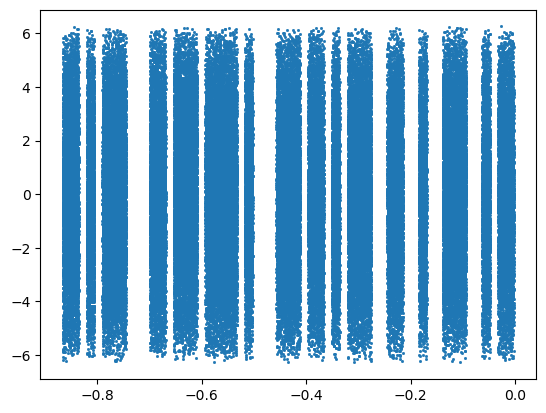

In [79]:
plt.plot(res_psu, res_phi, 's', markersize=1)